In [1]:
import numpy as np
import matplotlib.pylab as plt

`noise = np.random.normal(0,1,100)`
* 0 is the mean of the normal distribution you are choosing from
* 1 is the standard deviation of the normal distribution
* 100 is the number of elements you get in array noise

In [2]:
# generate 3 noise signals
baseline_1 = np.random.normal(0,1,100)
baseline_2 = np.random.normal(0.1,1.1,100)
baseline_3 = np.random.normal(-0.2,1,100)
xvalues = range(100)

Plot mean and standard deviation

In [3]:
xcorr_means = [np.mean(xcorr_baseline) for xcorr_baseline in [baseline_1, baseline_2, baseline_3]]
xcorr_stds = [np.std(xcorr_baseline) for xcorr_baseline in [baseline_1, baseline_2, baseline_3]]

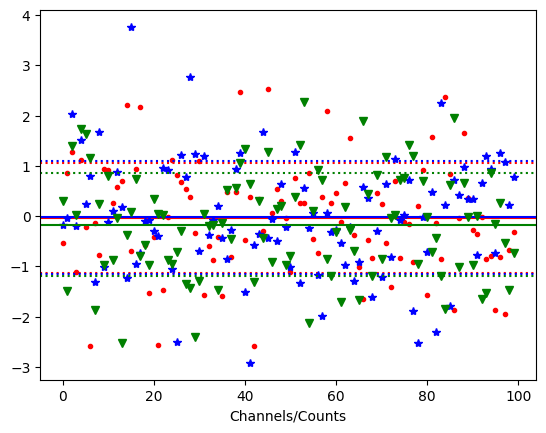

In [4]:
# Ignore, not for analysis, only for visual display
plt.figure()
plt.plot(xvalues, baseline_1, 'r.')
plt.axhline(y=xcorr_means[0], color='r')
plt.axhline(y=xcorr_means[0]+xcorr_stds[0], color='r', linestyle=":")
plt.axhline(y=xcorr_means[0]-xcorr_stds[0], color='r', linestyle=":")
plt.plot(xvalues, baseline_2, 'b*')
plt.axhline(y=xcorr_means[1], color='b')
plt.axhline(y=xcorr_means[1]+xcorr_stds[1], color='b', linestyle=":")
plt.axhline(y=xcorr_means[1]-xcorr_stds[1], color='b', linestyle=":")
plt.plot(xvalues, baseline_3, 'gv')
plt.axhline(y=xcorr_means[2], color='g')
plt.axhline(y=xcorr_means[2]+xcorr_stds[2], color='g', linestyle=":")
plt.axhline(y=xcorr_means[2]-xcorr_stds[2], color='g', linestyle=":")
plt.xlabel("Channels/Counts")
plt.show()

Slope across the band and gradient calculation

In [5]:
def fitme(xvalues, yvalues):
  fit = np.polyfit(xvalues,yvalues,1) # increase order to get better fit
  fit_fn = np.poly1d(fit)
  return fit_fn(xvalues)

gradient = []
for bl in [baseline_1, baseline_2, baseline_3]:
  y_values = fitme(xvalues, bl)
  gradient.append(np.rad2deg(np.arctan2(y_values[-1] - y_values[0], xvalues[-1] - xvalues[0])))
# expect gradients to be less than 1 degree to represent a flat line
print(np.any(np.abs(gradient)>1))

False


Ignore from here, just plotting for visual inspection

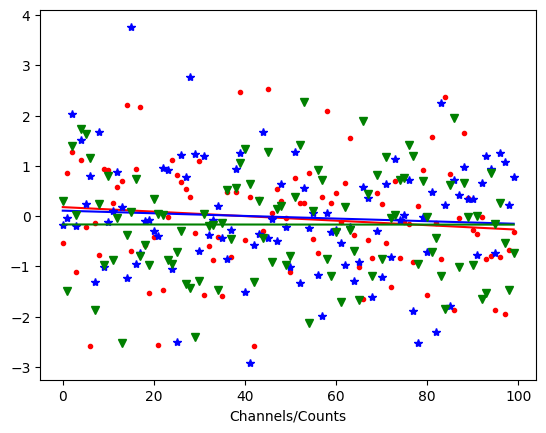

In [6]:
# Fit the trend line.
(m1, b1), (SSE,), *_ = np.polyfit(xvalues, baseline_1, deg=1, full=True)
(m2, b2), (SSE,), *_ = np.polyfit(xvalues, baseline_2, deg=1, full=True)
(m3, b3), (SSE,), *_ = np.polyfit(xvalues, baseline_3, deg=1, full=True)

plt.figure()
plt.plot(xvalues, baseline_1, 'r.', xvalues, m1 * xvalues + b1, 'r')
plt.plot(xvalues, baseline_2, 'b*', xvalues, m2 * xvalues + b2, 'b')
plt.plot(xvalues, baseline_3, 'gv', xvalues, m3 * xvalues + b3, 'g')
plt.xlabel("Channels/Counts")
plt.show()